Mục tiêu của bài thực hành là trình bày cách thực hiện regularization: dropout và L2.   
Khai báo thư viện:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

from keras.layers import Input, Dense, Dropout
from keras.regularizers import l2
from keras.models import Model

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

Load dữ liệu:

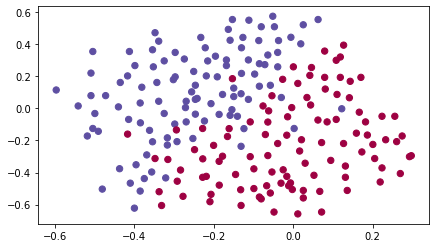

In [2]:

data = scipy.io.loadmat('datasets/data.mat')
train_X = data['X']
train_Y = data['y']
test_X = data['Xval']
test_Y = data['yval']

plt.scatter(train_X.T[0, :], train_X.T[1, :], c=train_Y.T, s=40, cmap=plt.cm.Spectral);

Mô hình NN không regularization

In [3]:
def model1(input_shape):
    X_input = Input(input_shape)
    X = Dense(20, activation='relu')(X_input)
    X = Dense(3, activation='relu')(X)
    X = Dense(1, activation='relu')(X)
    model = Model(inputs = X_input, outputs = X, name='model1')

    return model


In [4]:
Model1 = model1(train_X.shape[1:])

In [5]:
Model1.compile(loss ='binary_crossentropy', metrics = ["accuracy"])

In [6]:
Model1.fit(x = train_X, y = train_Y,epochs = 500)

 - accuracy: 0.9404
Epoch 481/500
7/7 [==============================] - 0s 2ms/step - loss: 0.2487 - accuracy: 0.9037
Epoch 482/500
7/7 [==============================] - 0s 2ms/step - loss: 0.2404 - accuracy: 0.9266
Epoch 483/500
7/7 [==============================] - 0s 2ms/step - loss: 0.2216 - accuracy: 0.9266
Epoch 484/500
7/7 [==============================] - 0s 2ms/step - loss: 0.1948 - accuracy: 0.9432
Epoch 485/500
7/7 [==============================] - 0s 2ms/step - loss: 0.1811 - accuracy: 0.9486
Epoch 486/500
7/7 [==============================] - 0s 3ms/step - loss: 0.2162 - accuracy: 0.9165
Epoch 487/500
7/7 [==============================] - 0s 2ms/step - loss: 0.2153 - accuracy: 0.9317
Epoch 488/500
7/7 [==============================] - 0s 3ms/step - loss: 0.2217 - accuracy: 0.9260
Epoch 489/500
7/7 [==============================] - 0s 2ms/step - loss: 0.2336 - accuracy: 0.9149
Epoch 490/500
7/7 [==============================] - 0s 2ms/step - loss: 0.2131 - accurac

In [7]:
preds_train = Model1.evaluate(x = train_X, y = train_Y)
preds_test = Model1.evaluate(x = test_X, y = test_Y)

print()
print ("Loss = " + str(preds_train[0]))
print ("Train Accuracy = " + str(preds_train[1]))

print()
print ("Loss = " + str(preds_test[0]))
print ("Test Accuracy = " + str(preds_test[1]))

7/7 [==============================] - 0s 2ms/step - loss: 0.4705 - accuracy: 0.9200

Loss = 0.20552003383636475
Train Accuracy = 0.9336493015289307

Loss = 0.47047537565231323
Test Accuracy = 0.9200000166893005


Mô hình với Dropout

In [8]:
def model2(input_shape):
    X_input = Input(input_shape)
    X = Dense(20, activation='relu')(X_input)
    X = Dropout(0.7)(X)
    X = Dense(3, activation='relu')(X)
    X = Dense(1, activation='relu')(X)
    model = Model(inputs = X_input, outputs = X, name='model2')

    return model

In [9]:
Model2 = model2(train_X.shape[1:])

In [10]:
Model2.compile(loss ='binary_crossentropy', metrics = ["accuracy"])

In [11]:
Model2.fit(x = train_X, y = train_Y, epochs = 500)

 - accuracy: 0.8732
Epoch 481/500
7/7 [==============================] - 0s 2ms/step - loss: 0.4841 - accuracy: 0.9188
Epoch 482/500
7/7 [==============================] - 0s 2ms/step - loss: 0.4277 - accuracy: 0.8947
Epoch 483/500
7/7 [==============================] - 0s 3ms/step - loss: 0.6532 - accuracy: 0.9088
Epoch 484/500
7/7 [==============================] - 0s 3ms/step - loss: 0.6905 - accuracy: 0.8985
Epoch 485/500
7/7 [==============================] - 0s 3ms/step - loss: 0.3825 - accuracy: 0.8975
Epoch 486/500
7/7 [==============================] - 0s 3ms/step - loss: 0.5325 - accuracy: 0.9136
Epoch 487/500
7/7 [==============================] - 0s 3ms/step - loss: 0.5914 - accuracy: 0.8849
Epoch 488/500
7/7 [==============================] - 0s 3ms/step - loss: 0.5257 - accuracy: 0.8827
Epoch 489/500
7/7 [==============================] - 0s 2ms/step - loss: 0.6768 - accuracy: 0.8902
Epoch 490/500
7/7 [==============================] - 0s 2ms/step - loss: 0.9223 - accurac

In [12]:
preds_train = Model2.evaluate(x = train_X, y = train_Y)
preds_test = Model2.evaluate(x = test_X, y = test_Y)

print()
print ("Loss = " + str(preds_train[0]))
print ("Train Accuracy = " + str(preds_train[1]))

print()
print ("Loss = " + str(preds_test[0]))
print ("Test Accuracy = " + str(preds_test[1]))

7/7 [==============================] - 0s 3ms/step - loss: 0.6107 - accuracy: 0.9300

Loss = 0.49612924456596375
Train Accuracy = 0.9336493015289307

Loss = 0.6106970310211182
Test Accuracy = 0.9300000071525574


Mô hình với L2

In [13]:
def model3(input_shape):
    X_input = Input(input_shape)
    X = Dense(20, activation='relu')(X_input)
    X = Dense(3, activation='relu')(X)
    X = Dense(1, activation='relu', kernel_regularizer=l2(0.7))(X)
    model = Model(inputs = X_input, outputs = X, name='model3')

    return model

In [14]:
Model3 = model3(train_X.shape[1:])

In [15]:
Model3.compile(loss ='binary_crossentropy', metrics = ["accuracy"])

In [16]:
Model3.fit(x = train_X, y = train_Y, epochs = 500)

 - accuracy: 0.8911
Epoch 481/500
7/7 [==============================] - 0s 2ms/step - loss: 0.2616 - accuracy: 0.9105
Epoch 482/500
7/7 [==============================] - 0s 2ms/step - loss: 0.2516 - accuracy: 0.9203
Epoch 483/500
7/7 [==============================] - 0s 2ms/step - loss: 0.2822 - accuracy: 0.8946
Epoch 484/500
7/7 [==============================] - 0s 2ms/step - loss: 0.2358 - accuracy: 0.9129
Epoch 485/500
7/7 [==============================] - 0s 2ms/step - loss: 0.2785 - accuracy: 0.9032
Epoch 486/500
7/7 [==============================] - 0s 2ms/step - loss: 0.2536 - accuracy: 0.9037
Epoch 487/500
7/7 [==============================] - 0s 2ms/step - loss: 0.2387 - accuracy: 0.9154
Epoch 488/500
7/7 [==============================] - 0s 2ms/step - loss: 0.2552 - accuracy: 0.8973
Epoch 489/500
7/7 [==============================] - 0s 2ms/step - loss: 0.2143 - accuracy: 0.9399
Epoch 490/500
7/7 [==============================] - 0s 2ms/step - loss: 0.2521 - accurac

In [17]:
preds_train = Model3.evaluate(x = train_X, y = train_Y)
preds_test = Model3.evaluate(x = test_X, y = test_Y)

print()
print ("Loss = " + str(preds_train[0]))
print ("Train Accuracy = " + str(preds_train[1]))

print()
print ("Loss = " + str(preds_test[0]))
print ("Test Accuracy = " + str(preds_test[1]))

7/7 [==============================] - 0s 1ms/step - loss: 0.4993 - accuracy: 0.9200

Loss = 0.2601044774055481
Train Accuracy = 0.900473952293396

Loss = 0.49927017092704773
Test Accuracy = 0.9200000166893005
